## Графический разведывательный анализ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
%matplotlib inline

### Зачем?

Без использования визулаьных методов мы можем допустить ошибку в оценках распределений:

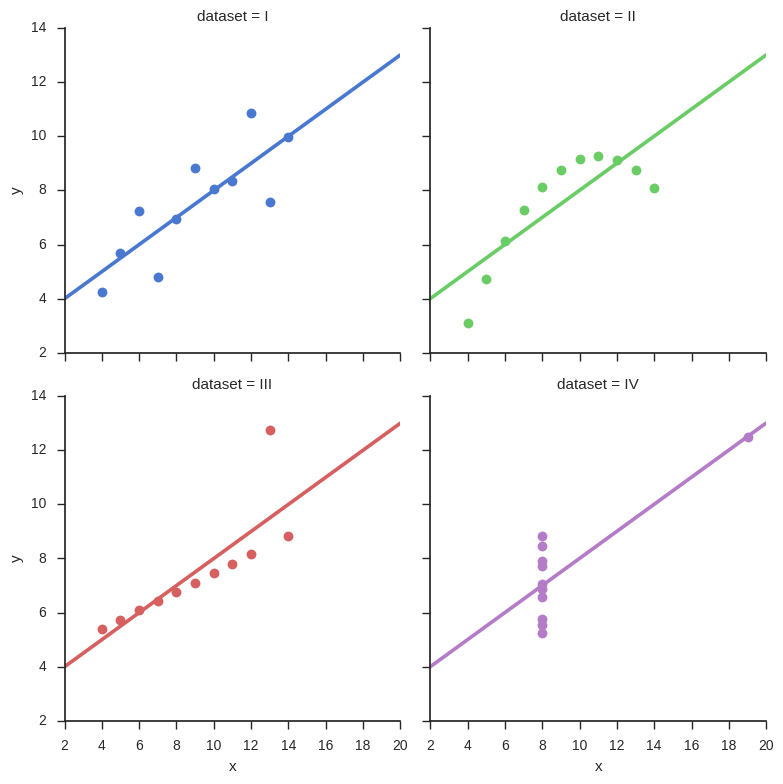

In [2]:
sns.set(style="ticks")

df = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

In [3]:
for j in df.dataset.unique():
    smalldata = df.loc[df.dataset == j]
    print('Dataset %s: mean(y)=%1.2f, std(y)=%1.2f, r(x,y)=%1.2f' % (j, smalldata.y.mean(), smalldata.y.std(), smalldata.corr().iloc[0,1]))

Dataset I: mean(y)=7.50, std(y)=2.03, r(x,y)=0.82
Dataset II: mean(y)=7.50, std(y)=2.03, r(x,y)=0.82
Dataset III: mean(y)=7.50, std(y)=2.03, r(x,y)=0.82
Dataset IV: mean(y)=7.50, std(y)=2.03, r(x,y)=0.82


### Пакеты

* Matplotlib
* Seaborn
* Bokeh, plotly

### Общие соображения

* Наличие мусора на графике
* Необходимая информация
* Масштаб

Графики с одними и теме же данными, но разным масштабом создают различное впечатление:

(0, 21)

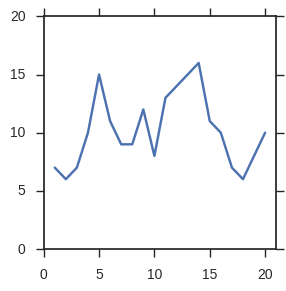

In [112]:
series1 = pd.read_csv("series1.csv", sep=";")
plt.figure(figsize=(3,3))
plt.plot(series1.Day, series1.Value)
plt.ylim([0, 20])
plt.xlim([0, 21])

(0, 21)

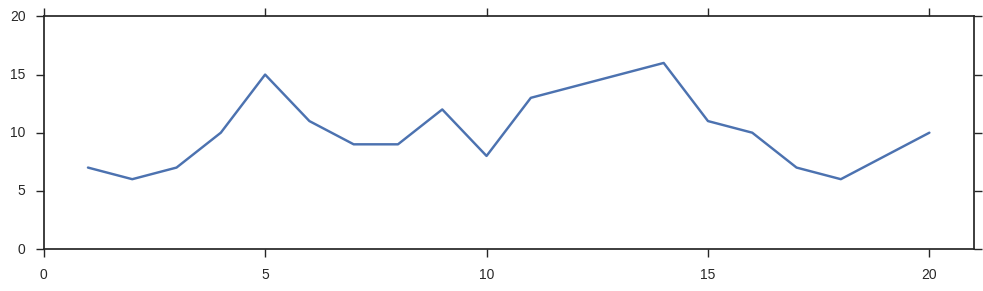

In [76]:
plt.figure(figsize=(12,3))
plt.plot(series1.Day, series1.Value)
plt.ylim([0, 20])
plt.xlim([0, 21])

### Гистограмма

In [5]:
house_data = pd.read_csv("kc_house_data.csv")
small_data = house_data[:200]

Гистограммы позволяют получить представление о распределении показателя.

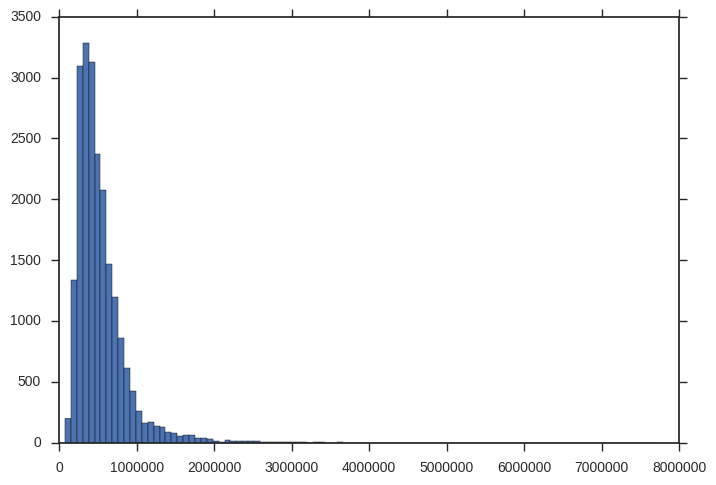

In [94]:
n, bins, patches = plt.hist(house_data.price, 100)

Внешний вид гистограммы сильно зависит от размера и границ бинов. Неудачный выбор бинов может исказить информацию:

(0, 2000000)

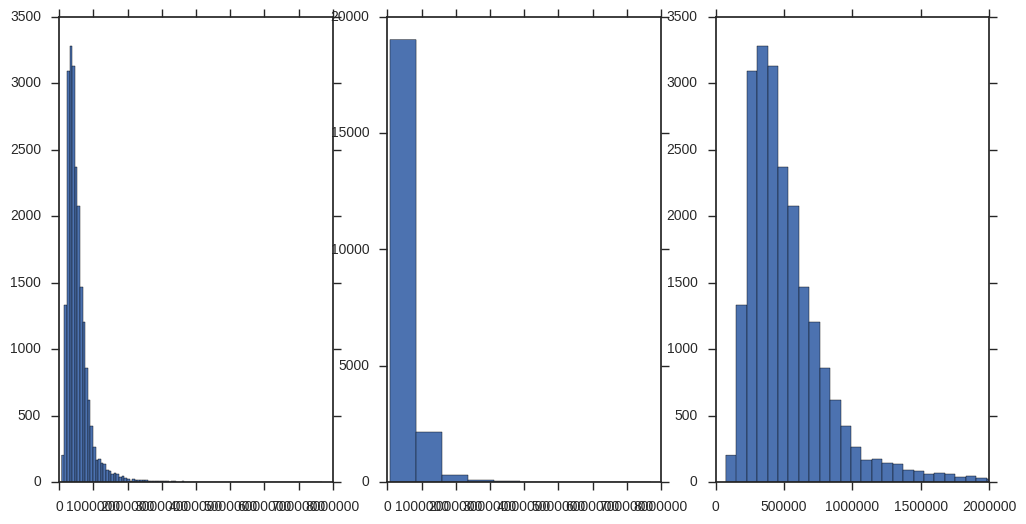

In [115]:
plt.figure(1, figsize = (12,6))
plt.subplot(131)
n, bins, patches = plt.hist(house_data.price, 100)
plt.subplot(132)
n1, bins1, patches1 = plt.hist(house_data.price)
plt.subplot(133)
n2, bins2, patches2 = plt.hist(house_data.price, 100)
plt.xlim(0, 2000000)

В случае небольшого количества данных можно использовать бины разного размера

Гистограммы часто сочетаются с методиками восстановления плотности

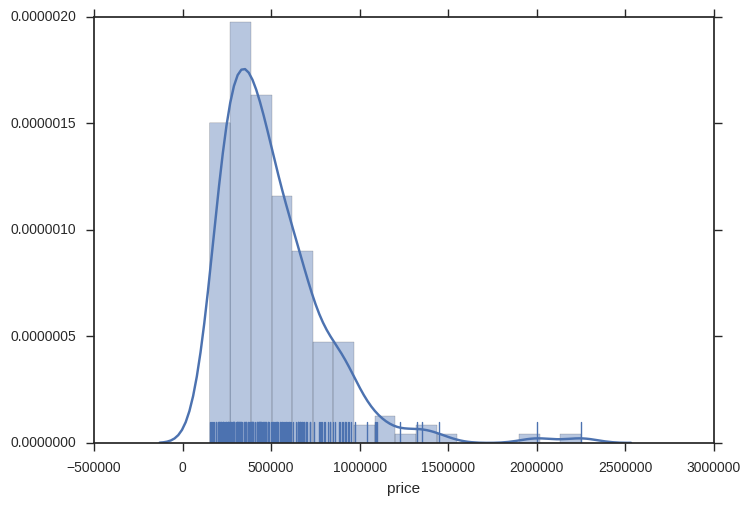

In [152]:
sns.distplot(small_data.price, kde = True, rug = True)

### Scatterplot

Scatterplot хорошо сочетается с оценкой плотности распределения для отдельных переменных:

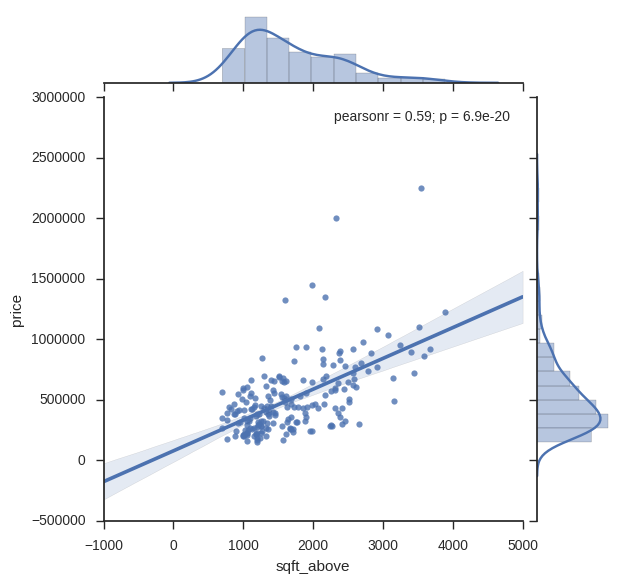

In [138]:
g = sns.jointplot("sqft_above", "price", data=small_data, kind="reg")

Полезно строить графики для всех переменных сразу.
Стандартным методом:

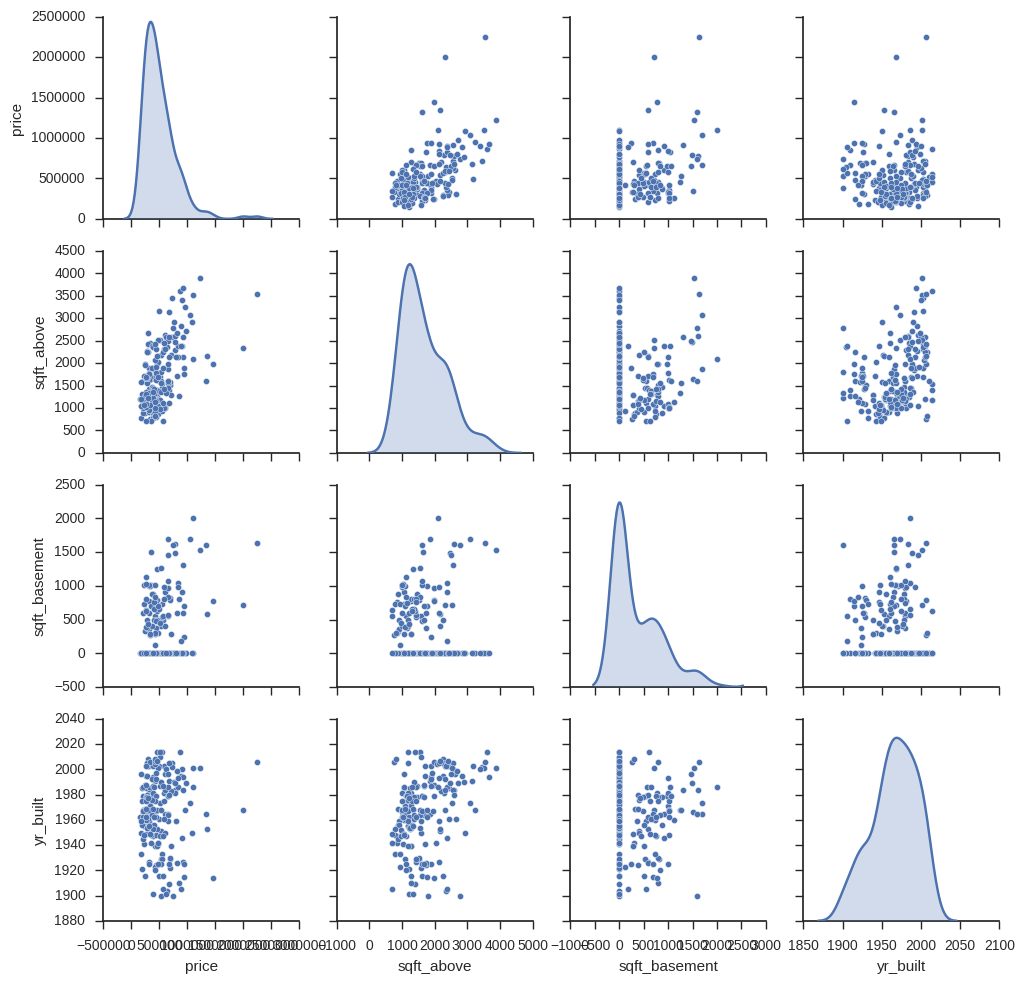

In [140]:
sns.pairplot(small_data[["price", "sqft_above", "sqft_basement", "yr_built"]], diag_kind="kde", diag_kws=dict(shade=True))

Или расширенным:

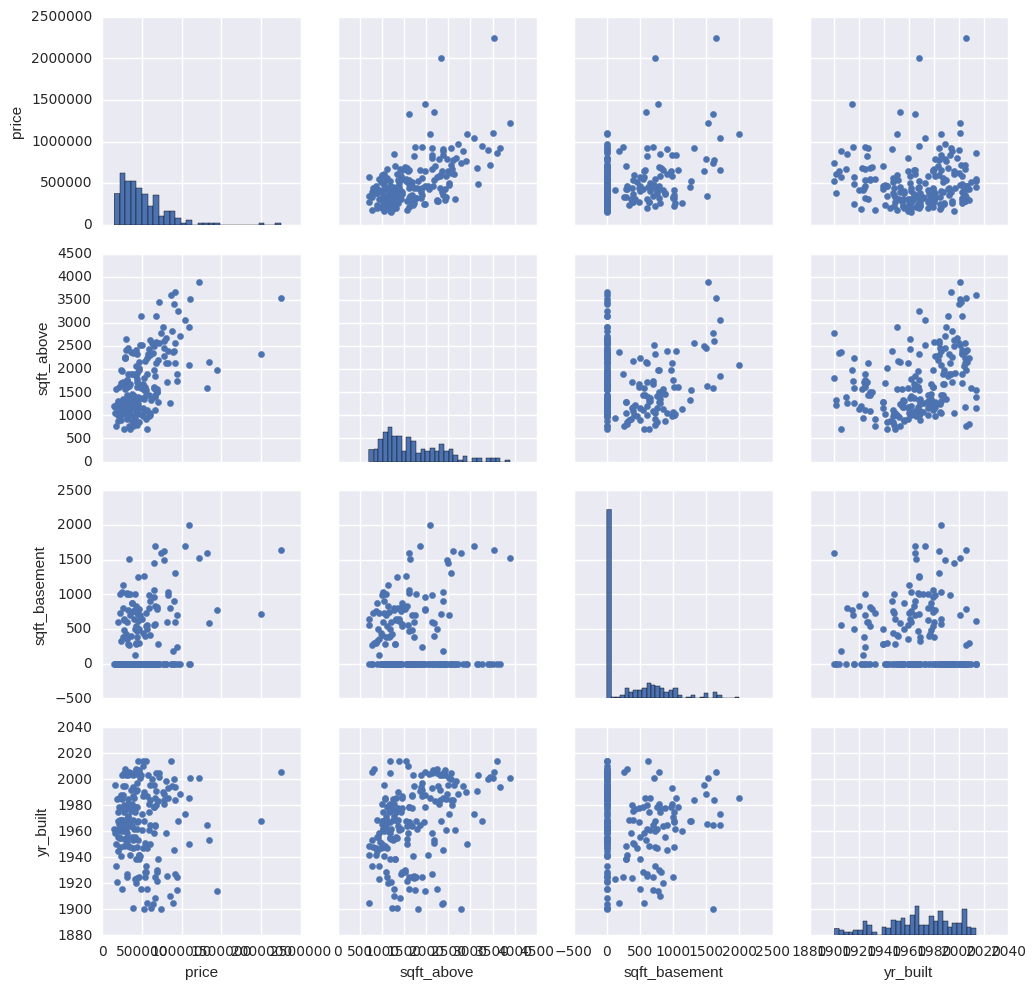

In [169]:
g = sns.PairGrid(small_data[["price", "sqft_above", "sqft_basement", "yr_built"]])
g = g.map_diag(plt.hist, bins=30)
g = g.map_offdiag(plt.scatter)

В случае большого количества данных. scatterplot иногда перестает быть информативным:

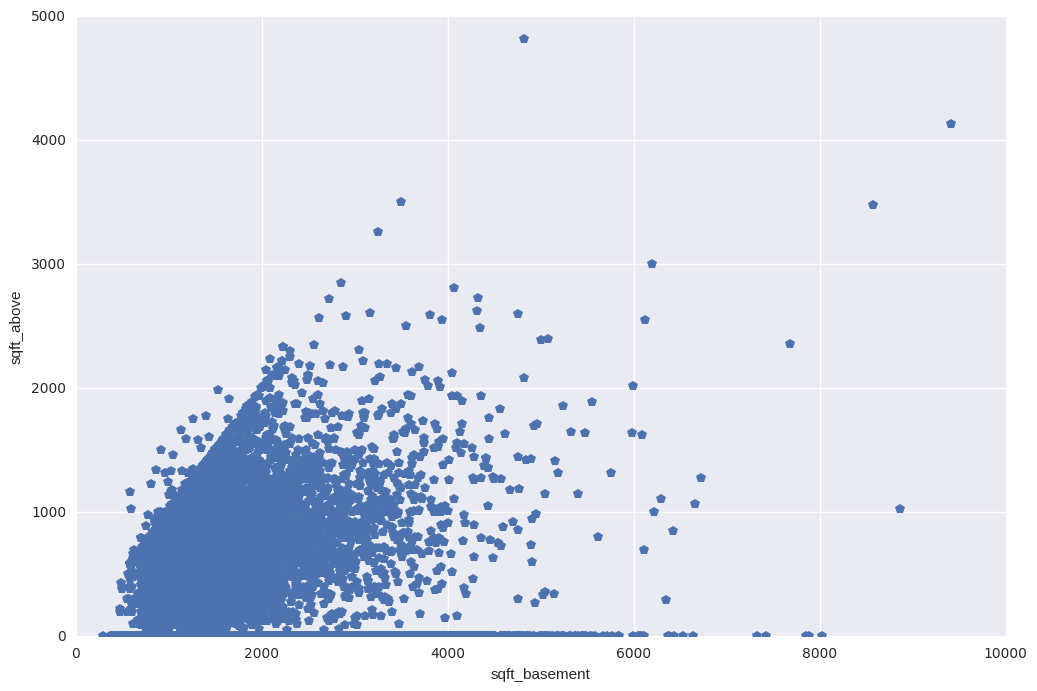

In [161]:
plt.figure(figsize=(12,8))
plt.plot(house_data.sqft_above, house_data.sqft_basement, "p")
plt.ylim(0,5000)
plt.xlim(0,10000)
plt.ylabel("sqft_above")
plt.xlabel("sqft_basement")
plt.show()

В таком случае можно уменьшить размер маркера, визуализировать выборку, использовать прозрачные маркеры

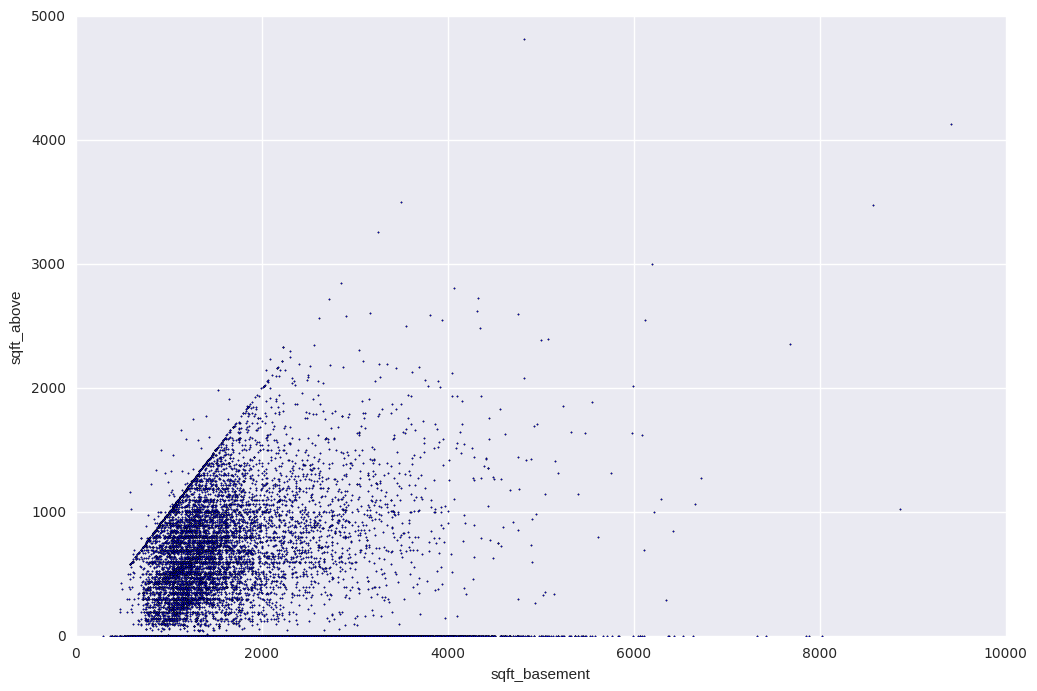

In [160]:
plt.figure(figsize=(12,8))
plt.scatter(house_data.sqft_above, house_data.sqft_basement, s=1, marker = 'o', c='blue')
plt.ylim(0,5000)
plt.xlim(0,10000)
plt.ylabel("sqft_above")
plt.xlabel("sqft_basement")
plt.show()

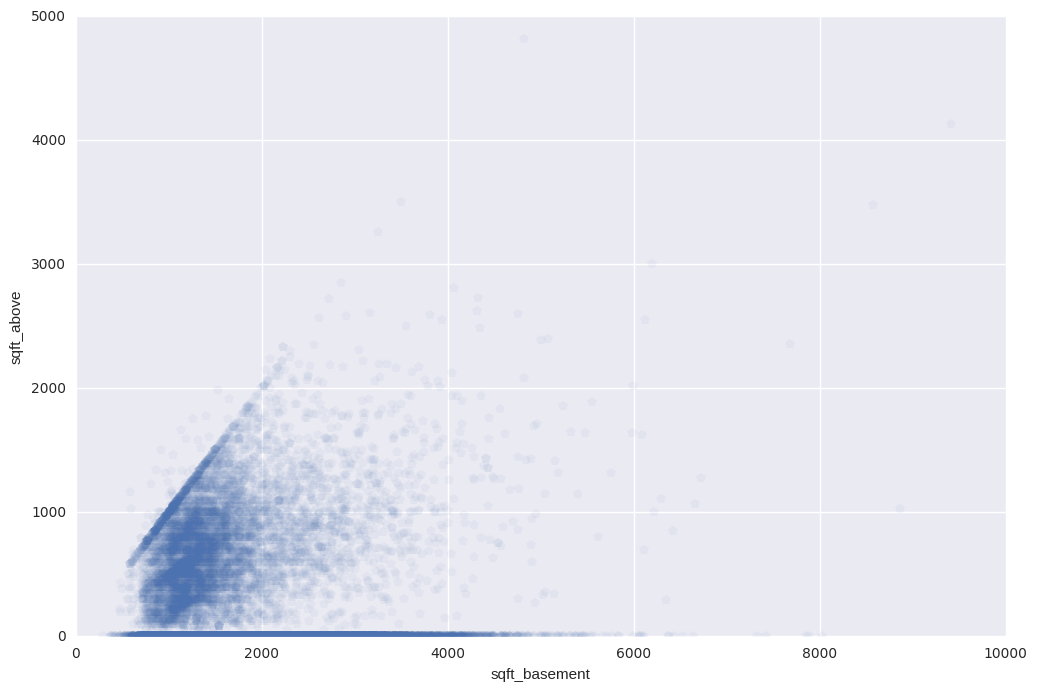

In [162]:
plt.figure(figsize=(12,8))
plt.plot(house_data.sqft_above, house_data.sqft_basement, "p", alpha=0.05)
plt.ylim(0,5000)
plt.xlim(0,10000)
plt.ylabel("sqft_above")
plt.xlabel("sqft_basement")
plt.show()

### Heat maps

Другой альтернативой визуализации совместного распределения являются тепловые карты, основанные на воccтановлении плотности

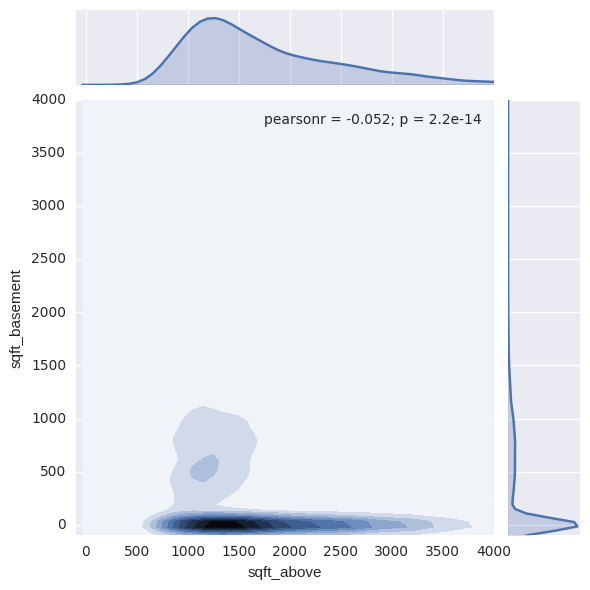

In [220]:
g = sns.jointplot("sqft_above", "sqft_basement", data=house_data, kind="kde", xlim=(-100, 4000), ylim=(-100, 4000))

Построим карту для sqft_basement>0

(-100, 3000)

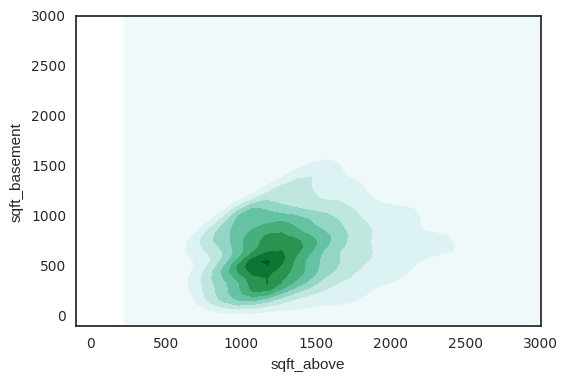

In [229]:
sns.set_style(style='white')
with_basement = house_data.loc[house_data.sqft_basement>0]
f = sns.kdeplot(with_basement.sqft_above, with_basement.sqft_basement, shade=True)
f.axes.set_ylim(-100,3000)
f.axes.set_xlim(-100,3000)

### Box plot

Box plot дополняет наше представление о распределении одной величины с помощью визуализации числовых показателей распределения

In [69]:
house_data.columns
house_data.waterfront.unique()

array([0, 1])

In [79]:
house_data["features"] = "None"
house_data.features.loc[house_data.waterfront==1] = "Waterfront only"
house_data.features.loc[house_data.view==1] = "View only"
house_data.features.loc[(house_data.view==1) & (house_data.waterfront==1)] = "Waterfront & View"

In [80]:
house_data.features.value_counts()

None                 21119
View only              331
Waterfront only        162
Waterfront & View        1
Name: features, dtype: int64

In [81]:
house_data.features.loc[(house_data.view==1) & (house_data.waterfront==1)] = None

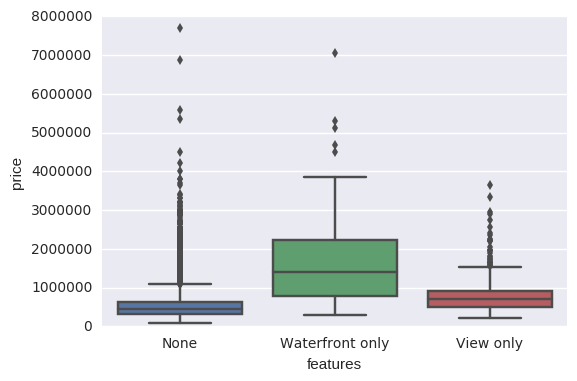

In [82]:
sns.boxplot(x = house_data.features, y = house_data.price)

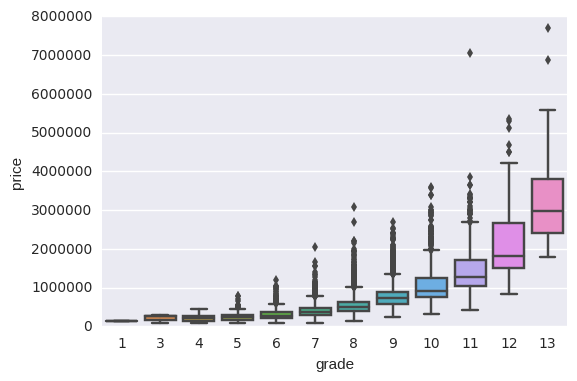

In [170]:
sns.boxplot(x = house_data.grade, y = house_data.price)

### Violin plot

Violin plot пытается совместить преимущества точечного графика и Box plot'а

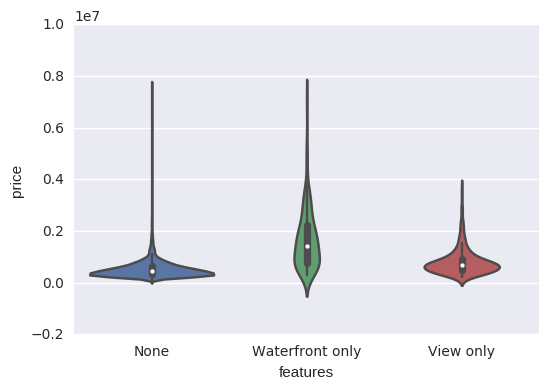

In [84]:
sns.violinplot(x = house_data.features, y = house_data.price)

### Bubble plots

Используются для демонстрации значения третьей переменной для некоторых групп.

In [116]:
house_data.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15',
       u'year_month', u'features'],
      dtype='object')

In [133]:
agg_sum = house_data.groupby(["bedrooms", "floors"], as_index = False).price.agg(["sum", "count"]).reset_index()
agg_sum = agg_sum.loc[agg_sum.bedrooms<10]

In [134]:
agg_sum["sum"] = agg_sum["sum"]/agg_sum["sum"].sum()
agg_sum["count"] = agg_sum["count"]/agg_sum["count"].sum()

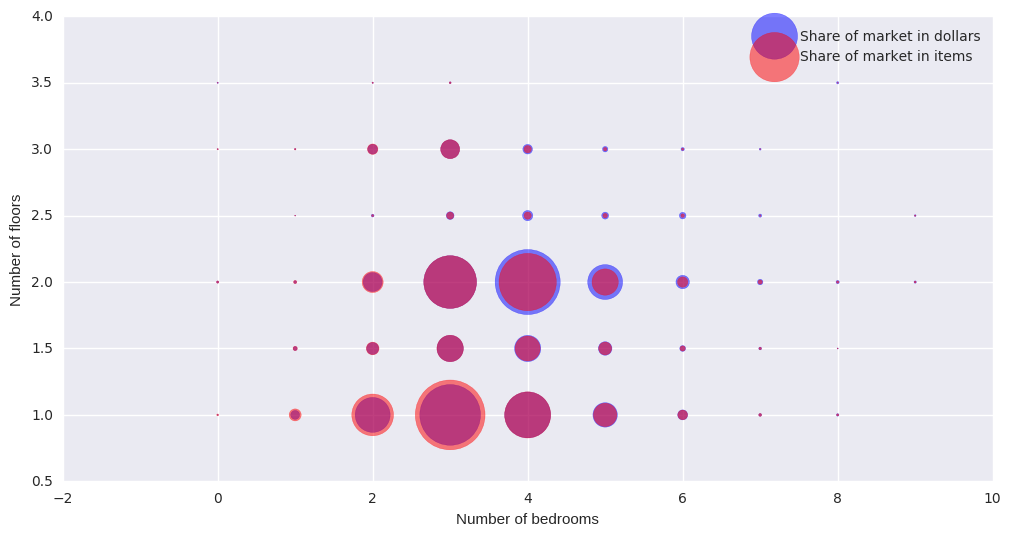

In [143]:
plt.figure(2, figsize = (12,6))
plt.scatter(agg_sum['bedrooms'], agg_sum['floors'], s=agg_sum['sum']*10000, alpha = 0.5, color ='blue')
plt.scatter(agg_sum['bedrooms'], agg_sum['floors'], s=agg_sum['count']*10000, alpha = 0.5, color ='red')
plt.ylabel("Number of floors")
plt.xlabel("Number of bedrooms")
plt.legend(["Share of market in dollars", "Share of market in items"])

Взгляд не всегда может уловить различия в размере шариков

### Кривая Лоренца

Уровень концентрации можно визуально оценить при помощи кривой Лоренца:

In [187]:
price_series = house_data.price.sort_values(ascending = True)/house_data.price.sum()

In [192]:
curve_data = price_series.cumsum().reset_index(drop=True)
x_axis = pd.Series(curve_data.index+1)/curve_data.size

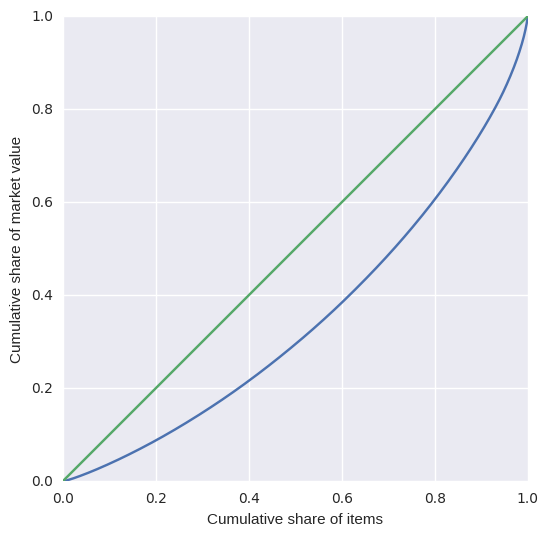

In [207]:
plt.figure(figsize=(6,6))
plt.plot(x_axis, curve_data)
plt.plot([0,1],[0,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel("Cumulative share of market value")
plt.xlabel("Cumulative share of items")
plt.show()

### Временные ряды

In [6]:
house_data["year_month"] = house_data.date.str.slice(0,6)
house_data["year_month"] = pd.to_datetime(house_data["year_month"], format="%Y%m")
avg_prices = house_data.groupby("year_month").price.mean()
n_lots = house_data.groupby(["year_month", "condition"]).price.count().reset_index()
n_lots.rename(columns={'price':'N_lots'}, inplace=True)
n_lots.year_month = pd.to_datetime(n_lots.year_month)

In [12]:
stack = n_lots.pivot(index = 'year_month', columns = 'condition', values = 'N_lots')
stack[stack.isnull()] = 0

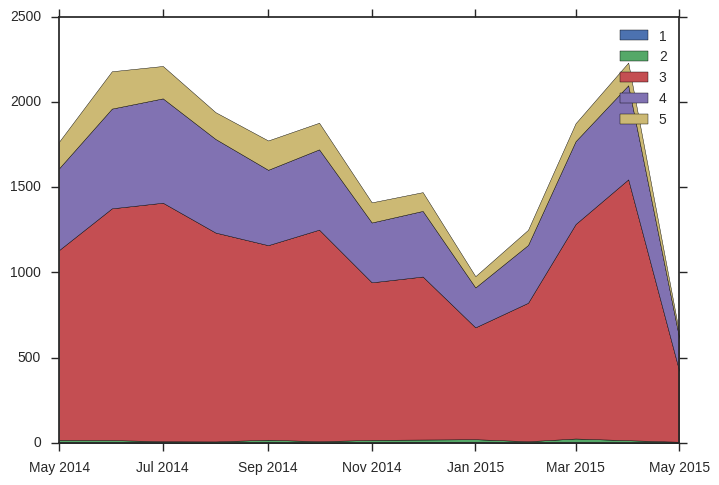

In [37]:
plt.stackplot(np.array(stack.index), np.array(stack).T)
plt.legend(stack.columns)

Еще можно привести к 100%:

In [46]:
stack = stack.div(stack.sum(axis = 1), axis = 0)

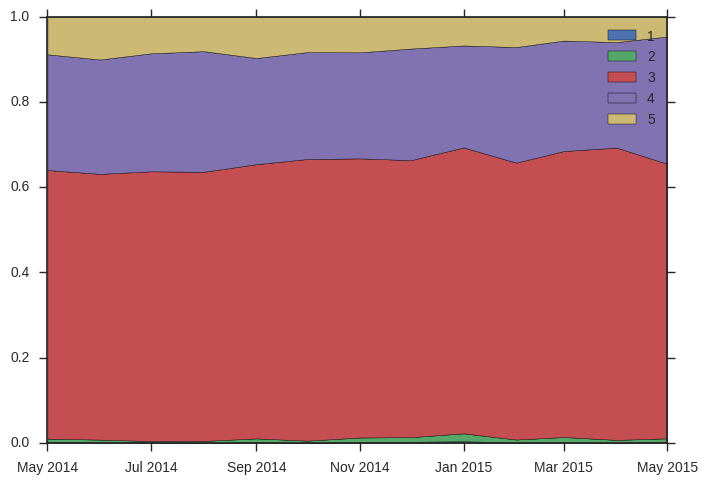

In [47]:
plt.stackplot(np.array(stack.index), np.array(stack).T)
plt.legend(stack.columns)

### Интерактивные графики

Интерактивные графики особенно полезны при визуализации временных рядов, но могут быть использованы и в других ситуациях:

In [74]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


graph1 = go.Scatter(x=avg_prices.index, y=avg_prices)
data=go.Data([graph1])
layout=go.Layout(yaxis={'title':'Average price', 'range':[0, 600000]})
figure=go.Figure(data=data, layout=layout)

iplot(figure)

In [68]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, Range1d
output_notebook()

hover = HoverTool(tooltips=[("Avg.price", "@y{int}")])

p = figure(plot_width=800, plot_height=800, x_axis_type="datetime", y_axis_type="linear", tools=[hover])
p.left[0].formatter.use_scientific = False
p.set(y_range=Range1d(0, 700000))
p.line(avg_prices.index, avg_prices, line_width=2)

show(p)

Loading BokehJS ...